<a href="https://colab.research.google.com/github/neliudochka/RosenblattPerceptron/blob/main/RosenblattsPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML 2A
## Rosenblatt’s perceptron


1. Implement a single-layer perceptron using such programming languages as Python, C++.

In [17]:
from random import random

# Make a prediction with weights
def predict(X, weights):
  # act = bias + ...
  activation = weights[0]
  # ... + w1*x1 + w2*x2 + ... + wn*xn
  for i in range(len(X)):
    activation += weights[i + 1] * X[i]
  if activation >= 0.0:
    return 1.0
  return 0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(trainX, trainY, learningRate, nEpoch):
  # define weights randomly
  #weights = [0.0 for i in range(len(train[0]))]
  weights = [random() for i in range(len(trainX[0])+1)]
  # print(weights)
  for epoch in range(nEpoch):
    j = 0
    for X in trainX:
      # predict output with current weight
      prediction = predict(X, weights)
      # actual - predicted
      error = trainY[j] - prediction
      # w0'=w0+lR*error
      weights[0] = weights[0] + learningRate * error
      j += 1
      for i in range(len(X)):
        # w'=w+lR*error*x
        weights[i + 1] = weights[i + 1] + learningRate * error * X[i]
      #print('>epoch=%d, actual=%d, expected=%d' % (epoch, row[-1], prediction))
  return weights

def perceptrone(trainX, trainY, testX, learningRate, nEpoch):
  weights = train_weights(trainX, trainY, learningRate, nEpoch)
  predictedY = list()
  for X in testX:
    predictedY.append(predict(X, weights))
  return predictedY, weights


**2. Train a neural network on a training sample using the Rosenblatt algorithm (training and test samples must be randomly formed (in the ratio of 70:30).**

**3. Check the operation of the perceptron on test data.**

In [18]:
#import module for data analysis
import pandas as pd
url='https://raw.githubusercontent.com/neliudochka/RosenblattPerceptron/main/data11.csv'

x1 = 'x1'
x2 = 'x2'
y = 'y'

data = pd.read_csv(url, header=0, names=[x1, x2, y])
data.head(2)

,x1,x2,y
0,0.134,0.460,0
1,0.724,0.527,1


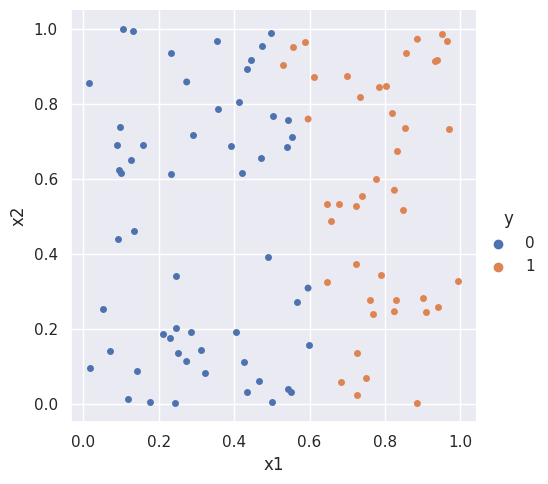

In [19]:
#module for visualization

import seaborn as sns
sns.set_theme()

sns.catplot(
    data=data, x="x1", y="x2", hue="y", native_scale=True)


In [86]:
#divide dataset
from sklearn.model_selection import train_test_split
import numpy as np

xTrain, xTest, yTrain, yTest = train_test_split(data[[x1, x2]], data[y], test_size=0.3, random_state=1)

In [87]:
learningRate = 0.2
nEpoch = 8

yPedicted, weights = perceptrone(np.array(xTrain), np.array(yTrain), np.array(xTest), learningRate, nEpoch)
print("weights: ", weights)

weights:  [-0.6349555202610281, 0.9169052454569249, 0.15512038209469203]


R2:  0.8642533936651584


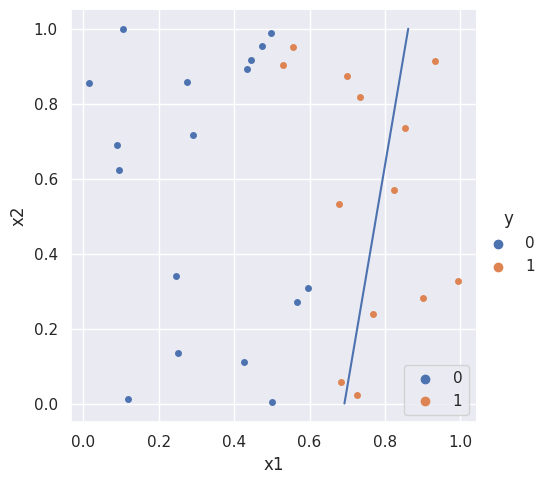

In [88]:
from sklearn.metrics import r2_score
dTest={x1: np.array(xTest[x1]), x2: np.array(xTest[x2]), y: np.array(yTest)}
dfTest = pd.DataFrame(dTest, columns=[x1, x2, y])

dPredicted={x1: np.array(xTest[x1]), x2: np.array(xTest[x2]), y: yPedicted}
dfPredicted = pd.DataFrame(dTest, columns=[x1, x2, y])

sns.catplot(
    data=dTest, x="x1", y="x2", hue="y", native_scale=True)

#build line that split classes
#for it we need two point
out1 = 0
out2 = 1
in1 = (-weights[0] +weights[2]*out1)/weights[1]
in2 = (-weights[0] +weights[2]*out2)/weights[1]
dLine={x1: [in1, in2], x2: [out1, out2]}
dfLine = pd.DataFrame(dLine, columns=[x1, x2])

sns.lineplot(data=dfLine, x='x1', y='x2')


print("R2: ", r2_score(yTest, yPedicted))

**Compare the results with similar results that are obtained as a result of using built-in functions.**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[-0.4] [[0.5994 0.0852]]
R2:  0.8642533936651584


<Axes: xlabel='x1', ylabel='x2'>

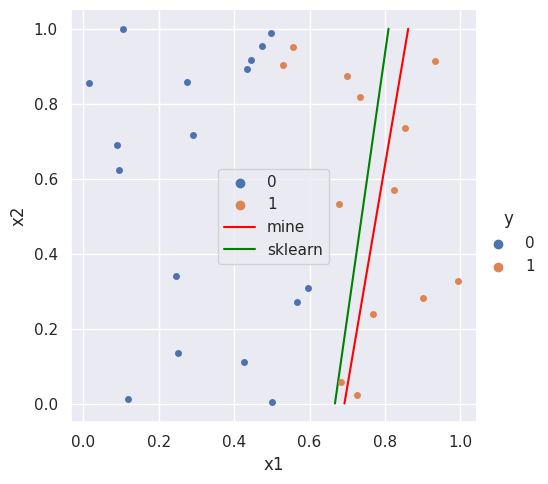

In [91]:
# with skilearn
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

model = Perceptron(eta0=0.2, max_iter=8, n_iter_no_change=8, random_state=1)

model.fit(xTrain, yTrain)

Perceptron()
yPredicted2 = model.predict(xTest)
print(model.intercept_, model.coef_)
print("R2: ", r2_score(yTest, yPredicted2))
sns.catplot(
    data=dTest, x="x1", y="x2", hue="y", native_scale=True)

#build line that split classes
#for it we need two point
out1 = 0
out2 = 1
in1 = (-model.intercept_[0]+model.coef_[0][1]*out1)/model.coef_[0][0]
in2 = (-model.intercept_[0]+model.coef_[0][1]*out2)/model.coef_[0][0]
dLine2={x1: [in1, in2], x2: [out1, out2]}
dfLine2 = pd.DataFrame(dLine2, columns=[x1, x2])

sns.lineplot(data=dfLine, x='x1', y='x2', label='mine', color='red')
sns.lineplot(data=dfLine2, x='x1', y='x2', label='sklearn', color='green')


From several tests I can conclude that efficiency of algorithm implemented by me, depends on a way test data is divided. And the one from sklearn is not that sensetive.